In [3]:
import matplotlib.pyplot as plt
import pathlib
import random 
import PIL.Image as Image
from tqdm import tqdm
import numpy as np
import cv2
import os

IMG_SHAPE = (64, 64)

In [4]:
DATA_DIR = pathlib.Path('.\\flowers\Processadas')
DATA_DIR

WindowsPath('flowers/Processadas')

In [5]:
list(DATA_DIR.glob('*/*.jpg'))[:5]

[WindowsPath('flowers/Processadas/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('flowers/Processadas/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('flowers/Processadas/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('flowers/Processadas/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('flowers/Processadas/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [7]:
image_count = (len(list(DATA_DIR.glob('*/*.jpg'))))
print(image_count)

1735


In [8]:
roses = list(DATA_DIR.glob('rose/*'))
roses[:5]

[WindowsPath('flowers/Processadas/rose/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flowers/Processadas/rose/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flowers/Processadas/rose/10503217854_e66a804309.jpg'),
 WindowsPath('flowers/Processadas/rose/118974357_0faa23cce9_n.jpg'),
 WindowsPath('flowers/Processadas/rose/11944957684_2cc806276e.jpg')]

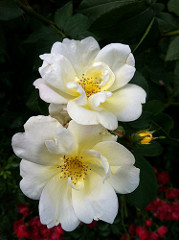

In [9]:
Image.open(str(roses[0]))

In [10]:
flowers_image_dict = {
    'roses' : list(DATA_DIR.glob('rose/*')),
    'daisy' : list(DATA_DIR.glob('daisy/*')),
    'dandelion' : list(DATA_DIR.glob('dandelion/*')),
    'sunflower' : list(DATA_DIR.glob('sunflower/*')),
    'tulips': list(DATA_DIR.glob('tulip/*')),
}

In [11]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4,
}

In [2]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
str(flowers_image_dict['roses'][0])

NameError: name 'cv2' is not defined

In [1]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
plt.imshow(img)

NameError: name 'cv2' is not defined

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, IMG_SHAPE).shape

(64, 64, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        try:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img, IMG_SHAPE)
            X.append(resized_img)
            y.append(flowers_labels_dict[flower_name])
        except Exception as e:
                pass

In [17]:
X[0]/255

array([[[0.03529412, 0.08627451, 0.05490196],
        [0.02745098, 0.08627451, 0.04313725],
        [0.00784314, 0.07058824, 0.02745098],
        ...,
        [0.09803922, 0.18431373, 0.12941176],
        [0.08627451, 0.18431373, 0.11764706],
        [0.09019608, 0.18823529, 0.12941176]],

       [[0.04705882, 0.07843137, 0.05098039],
        [0.03921569, 0.08235294, 0.04313725],
        [0.03137255, 0.08627451, 0.04313725],
        ...,
        [0.09803922, 0.2       , 0.14117647],
        [0.09803922, 0.18823529, 0.13333333],
        [0.07843137, 0.17647059, 0.09803922]],

       [[0.0627451 , 0.11372549, 0.07058824],
        [0.0627451 , 0.11764706, 0.07058824],
        [0.05098039, 0.11764706, 0.0627451 ],
        ...,
        [0.08235294, 0.18431373, 0.1254902 ],
        [0.06666667, 0.18823529, 0.10588235],
        [0.06666667, 0.16862745, 0.10196078]],

       ...,

       [[0.02352941, 0.06666667, 0.05882353],
        [0.00784314, 0.03529412, 0.01176471],
        [0.        , 0

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled.shape

(1388, 64, 64, 3)

In [22]:
X_test_scaled.shape

(347, 64, 64, 3)

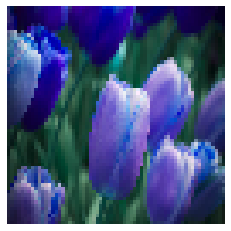

In [27]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

In [28]:
y_train[0]

4

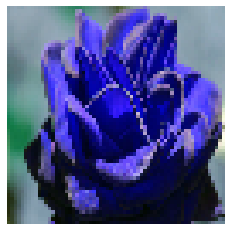

In [29]:
plt.axis('off')
plt.imshow(X_train_scaled[1])

In [30]:
y_train[1]

0

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization

In [61]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = X_train_scaled.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())  #converter para um vetor coluna

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 20, batch_size = 8, validation_split = 0.15, verbose = 2)

Train on 1179 samples, validate on 209 samples
Epoch 1/20
1179/1179 - 10s - loss: 1.7026 - acc: 0.2901 - val_loss: 1.6906 - val_acc: 0.2775
Epoch 2/20
1179/1179 - 9s - loss: 1.5094 - acc: 0.3800 - val_loss: 1.8636 - val_acc: 0.2584
Epoch 3/20
1179/1179 - 10s - loss: 1.3716 - acc: 0.4555 - val_loss: 1.6781 - val_acc: 0.3732
Epoch 4/20
1179/1179 - 10s - loss: 1.3397 - acc: 0.4741 - val_loss: 1.3714 - val_acc: 0.3397
Epoch 5/20
1179/1179 - 9s - loss: 1.2969 - acc: 0.4843 - val_loss: 1.2409 - val_acc: 0.4163
Epoch 6/20
1179/1179 - 11s - loss: 1.2075 - acc: 0.5013 - val_loss: 1.1513 - val_acc: 0.5215
Epoch 7/20
1179/1179 - 10s - loss: 1.2139 - acc: 0.5233 - val_loss: 1.3612 - val_acc: 0.4258
Epoch 8/20
1179/1179 - 10s - loss: 1.2316 - acc: 0.5259 - val_loss: 1.4098 - val_acc: 0.4163
Epoch 9/20
1179/1179 - 10s - loss: 1.1428 - acc: 0.5530 - val_loss: 1.4956 - val_acc: 0.4258
Epoch 10/20
1179/1179 - 10s - loss: 1.1626 - acc: 0.5454 - val_loss: 1.4934 - val_acc: 0.4785
Epoch 11/20
1179/1179 - 

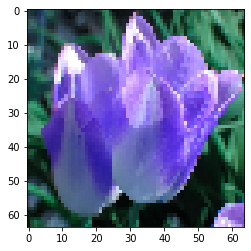

In [62]:
plt.imshow(X_test_scaled[0])

In [63]:
y_test[0]

4

In [65]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)

347/347 - 0s - loss: 1.2242 - acc: 0.4841


In [67]:
y_pred = model.predict(X_test_scaled)

In [69]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[0, 4, 3, 0, 1]

In [74]:
y_test[:5]

array([4, 3, 3, 0, 1])

In [75]:
classes = ['roses', 'daisy', 'dandelion', 'sunflower', 'tulips']

In [76]:
def plt_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

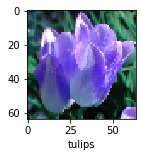

In [77]:
plt_sample(X_test_scaled, y_test, 0)

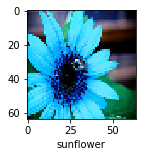

In [78]:
plt_sample(X_test_scaled, y_test, 1)

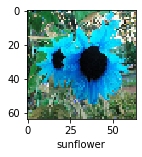

In [79]:
plt_sample(X_test_scaled, y_test, 2)

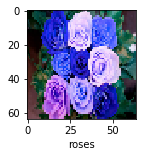

In [80]:
plt_sample(X_test_scaled, y_test, 3)

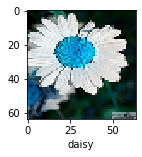

In [81]:
plt_sample(X_test_scaled, y_test, 4)